<a href="https://colab.research.google.com/github/Rifandika/Formula-1-Analysis-Project/blob/main/Formula1_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formula 1 Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as pg
import plotly.express as px
import seaborn as sns

In [ ]:
circuits = pd.read_csv("circuits.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
sprint_results = pd.read_csv("sprint_results.csv")
status = pd.read_csv("status.csv")

## Max Verstappen's Standings Over Time

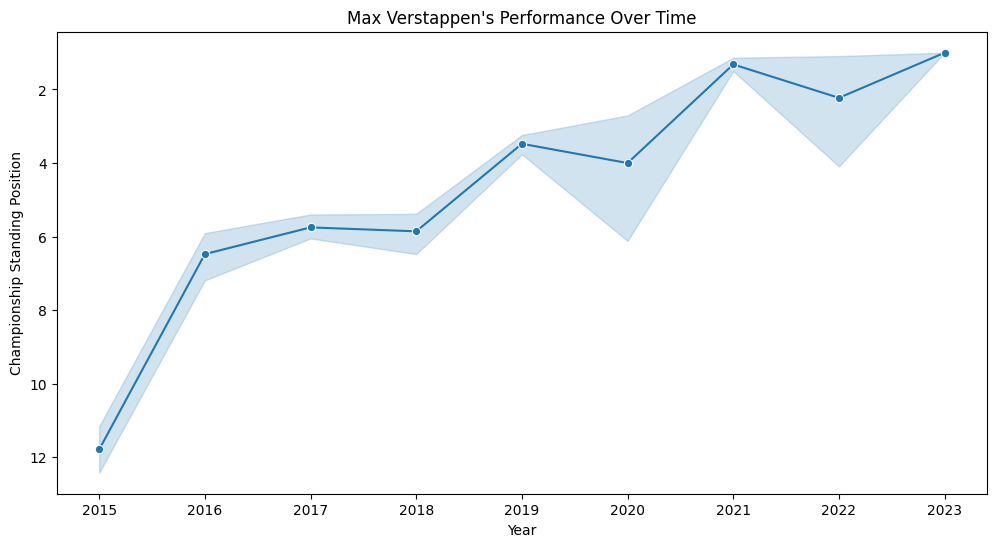

In [ ]:
# Merge data to get driver standings by year
driver_performance = pd.merge(driver_standings, drivers, on='driverId')
driver_performance = pd.merge(driver_performance, races, on='raceId')

# Filter data for Max Verstappen and relevant years
verstappen_performance = driver_performance[(driver_performance['surname'] == 'Verstappen') & (driver_performance['year'] >= 2015) & (driver_performance['year'] <= 2023)].copy()

# Ensure the 'year' column is an integer
verstappen_performance['year'] = verstappen_performance['year'].astype(int)

# Plot the standings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=verstappen_performance, x='year', y='position', marker='o')
plt.title("Max Verstappen's Performance Over Time")
plt.gca().invert_yaxis()  # Lower number is better (1st place is better than 10th)
plt.xticks(verstappen_performance['year'].unique())  # Ensure one-year gaps
plt.xlabel('Year')
plt.ylabel('Championship Standing Position')
plt.show()

## Red Bull's Standings Over Time

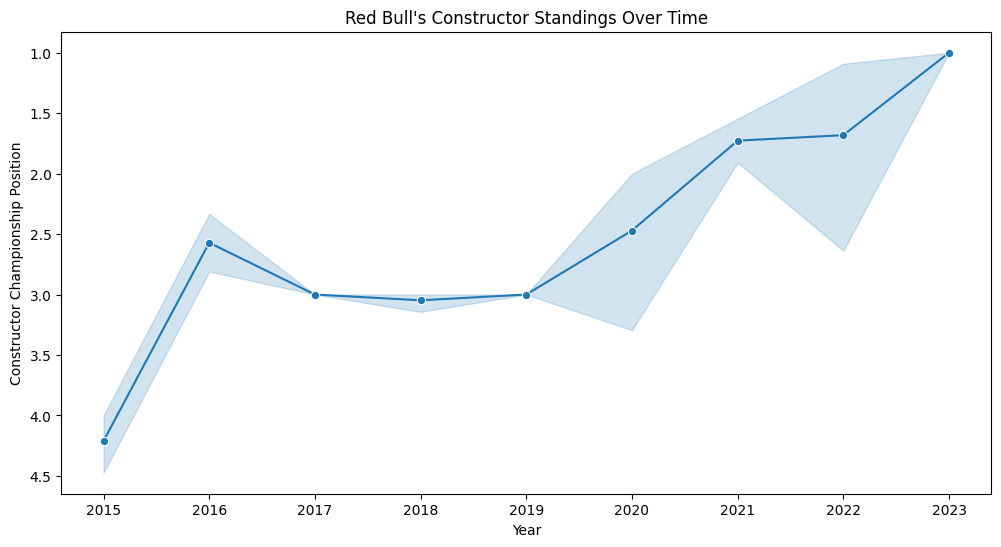

In [ ]:
# Merge constructor standings with races data
constructor_performance = pd.merge(constructor_standings, constructors, on='constructorId')
constructor_performance = pd.merge(constructor_performance, races, on='raceId')

# Analyze a specific constructor (e.g., Red Bull)
redbull_performance = constructor_performance[(constructor_performance['name_x'] == 'Red Bull') &
                                          (constructor_performance['year'] >= 2015) &
                                          (constructor_performance['year'] <= 2023)]

# Plot the constructor standings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=redbull_performance, x='year', y='position', marker='o')
plt.title("Red Bull's Constructor Standings Over Time")
plt.gca().invert_yaxis()  # Lower number is better
plt.xlabel('Year')
plt.xticks(redbull_performance['year'].unique())  # Ensure one-year gaps
plt.ylabel('Constructor Championship Position')
plt.show()

## All Time Races

In [ ]:
team = constructors.merge(results,on='constructorId',how = 'left')

best = team[['name','points','raceId']]
best = best.groupby('name')['raceId'].nunique().sort_values(ascending=False).reset_index(name = 'races')
best = best[best['races'] >= 100]
best.head(5)

,name,races
0,Ferrari,1088
1,McLaren,917
2,Williams,831
3,Tyrrell,433
4,Sauber,407


In [ ]:
fig = pg.Figure(
    data=[pg.Bar(x = best.name, y=best['races'])],
    layout_title_text="Constructor's All Time Races"

)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='red', width=2)))
fig.show()

## Constructor's Point Per Race

In [ ]:
def func(x):
    races = x['raceId'].nunique()
    points = x['points'].sum()

    if races == 0:
        return 0  # Avoid division by zero if a constructor has no races
    else:
        return points / races

data = team[team['name'].isin(best.name)].groupby('name').apply(func).sort_values(ascending=False).reset_index(name = 'points_per_race')
data.head(10)

<ipython-input-26-d6abd882b4aa>:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,name,points_per_race
0,Mercedes,24.598820
1,Red Bull,19.560209
2,Ferrari,9.900983
3,McLaren,7.292803
4,Force India,5.179245
5,Renault,4.409429
6,Williams,4.365824
7,Benetton,3.313462
8,BRM,2.584135
9,Team Lotus,2.518987


In [ ]:
fig = pg.Figure(
    data=[pg.Bar(x = data.name, y=data['points_per_race'])],
    layout_title_text="Constructor's Points per Race"

)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='red', width=2)))
fig.show()

## Constructor's Historical Points

In [ ]:
historic_points = team.groupby('name').agg({'points':'sum'}).sort_values('points',ascending=False).reset_index().head(10)
historic_points

,name,points
0,Ferrari,10772.27
1,Mercedes,7502.64
2,Red Bull,7472.00
3,McLaren,6687.50
4,Williams,3628.00
5,Renault,1777.00
6,Force India,1098.00
7,Team Lotus,995.00
8,Benetton,861.50
9,Tyrrell,711.00


In [ ]:
fig = pg.Figure(
    data=[pg.Bar(x = historic_points.name, y=historic_points['points'])],
    layout_title_text="Constructor's Historic Points"
)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='red', width=2)))
fig.show()

## Drivers Historical Points

In [ ]:
# Merge drivers and results DataFrames to access points data
driver_results = pd.merge(drivers, results, on='driverId', how='left')

# Group by surname and sum points, then sort and get top 10
driver_points = driver_results.groupby('surname').agg({'points':'sum'}).sort_values('points',ascending=False).reset_index().head(10)

driver_points

,surname,points
0,Hamilton,4713.5
1,Vettel,3098.0
2,Verstappen,2761.5
3,Alonso,2304.0
4,Schumacher,1907.0
5,Räikkönen,1873.0
6,Bottas,1788.0
7,Rosberg,1754.0
8,Pérez,1552.0
9,Ricciardo,1319.0


In [27]:
fig = pg.Figure(
    data=[pg.Bar(x=driver_points['surname'], y=driver_points['points'])],
    layout_title_text="Driver's Historical Points"
)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='red', width=2)))
fig.show()

## Most win by driver in a season

In [28]:
driver_position = drivers.merge(driver_standings,left_on='driverId',right_on='driverId',how = 'left')
driver_position = driver_position.merge(races,on = 'raceId',how = 'left')

In [29]:
positions = driver_position[driver_position['position'] == 1].groupby(
    ['surname','year'])['wins'].max().sort_values(ascending=False).reset_index(name = 'Wins')
positions.year = positions.year.astype(int)
positions.rename(columns={'surname':'name'},inplace=True)
positions.Wins = positions.Wins.astype('int64')

positions.head(10)

,name,year,Wins
0,Verstappen,2023,19
1,Verstappen,2022,15
2,Vettel,2013,13
3,Schumacher,2004,13
4,Hamilton,2014,11
5,Schumacher,2002,11
6,Hamilton,2019,11
7,Vettel,2011,11
8,Hamilton,2020,11
9,Hamilton,2018,11
